# Homework1

<ul>
    <li>Download the dataset and format it as a pandas DataFrame.
    <li>Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
        <ul>
    <li>Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
    <li>Find out the medals awarded in 2016 for each sport.
    <li>List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
     <li>Generate a bar plot of record counts corresponding to each of the top five sports.
    </ul>
    <li>Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
    <ul>
    <li>Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
    </ul>
        <li>Find out which national teams won the largest number of medals in the top five sports in 2016.
    <ul>
    <li>Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
        </li>
        </ul>
    <li>Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.
    <ul>
        <li>Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median, mean

sns.set(style = "whitegrid")
plt.style.use('ggplot')

### 1.Download the dataset and format it as a pandas DataFrame.

In [2]:
athlete_events = pd.read_csv("./data/athlete_events.csv")
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
athlete_events.shape

(271116, 15)

In [4]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
athlete_events.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
athlete_events.describe(include = 'O')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


### 2. Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.

<br>
<li>Filter the DataFrame to only include the rows corresponding to medal winners from 2016.


In [7]:
athlete_events.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [8]:
winners = athlete_events.dropna(subset = ["Medal"])
winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [9]:
winners_2016 = winners[winners.Year == 2016]
winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
161,65,Patimat Abakarova,F,21.0,165.0,49.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
450,250,Saeid Morad Abdevali,M,26.0,170.0,80.0,Iran,IRI,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver


<li> Find out the medals awarded in 2016 for each sport.

In [10]:
count_winner_2016 = winners_2016.Sport.value_counts()
count_winner_2016

Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Basketball                72
Volleyball                72
Wrestling                 72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Sailing                   45
Shooting                  45
Equestrianism             45
Weightlifting             45
Diving                    36
Taekwondo                 32
Synchronized Swimming     32
Badminton                 24
Tennis                    24
Table Tennis              24
Archery                   24
Rhythmic Gymnastics       18
Beach Volleyball          12
Triathlon                  6
Modern Pentathlon          6
Trampolining               6
Golf                       6
Name: Sport, d

<li> List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.

In [11]:
top5_sports = count_winner_2016.to_frame()[:5].index.to_list()
top5_sports

['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

In [12]:
winners_2016_top5 = winners_2016[winners_2016.Sport.isin(top5_sports)]
winners_2016_top5.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


<li> Generate a bar plot of record counts corresponding to each of the top five sports.

C:\Users\lenovo\anaconda3\envs\learn-python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


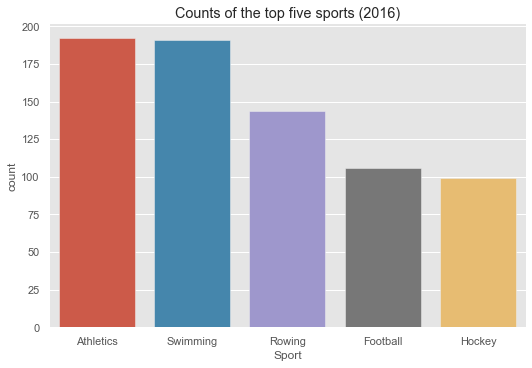

In [13]:
plt.style.use('ggplot')
ax1 = sns.catplot('Sport', data = winners_2016_top5, aspect = 1.5, kind = 'count' , order = top5_sports)
_ = ax1.set(title="Counts of the top five sports (2016)")

### 3.Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.

<ul>
    <li>Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
    </ul>

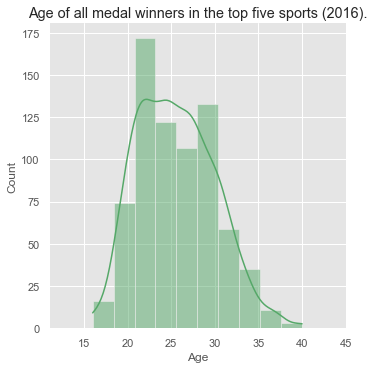

In [14]:
ax2 = sns.displot(winners_2016_top5.Age, kde = True, bins = 10, color = "g")
_ = ax2.set(xlim=(winners_2016_top5.Age.min()-5, winners_2016_top5.Age.max()+5), title = "Age of all medal winners in the top five sports (2016).")

### 4. Find out which national teams won the largest number of medals in the top five sports in 2016.
<br>
<li>Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.

In [15]:
winners_2016_top5.Team.unique()

array(['Italy', 'Australia', 'Netherlands', 'New Zealand',
       'United States', 'Nigeria', 'Canada', 'Jamaica', 'Denmark',
       'Sweden', 'Great Britain', 'Japan', 'Ethiopia', 'France',
       'Kazakhstan', 'Germany', 'Qatar', 'Spain', 'Romania', 'Belgium',
       'Ukraine', 'Norway', 'Brazil', 'South Africa', 'Bahamas',
       'Argentina', 'Cuba', 'China', 'Kenya', 'Russia', 'Poland',
       'Turkey', 'Hungary', 'Bulgaria', 'Estonia', 'Belarus', 'Greece',
       'Mexico', 'Lithuania', 'Switzerland', 'Colombia', 'Grenada',
       'Bahrain', 'Croatia', 'Algeria', 'Tajikistan', 'Burundi',
       'Ireland', 'Venezuela', 'Singapore', 'Serbia', 'Czech Republic',
       'Slovakia', 'Trinidad and Tobago'], dtype=object)

In [16]:
team_rank = winners_2016_top5.Team.value_counts().index.to_list()
team_rank[:5]

['United States', 'Germany', 'Great Britain', 'Canada', 'Australia']

C:\Users\lenovo\anaconda3\envs\learn-python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


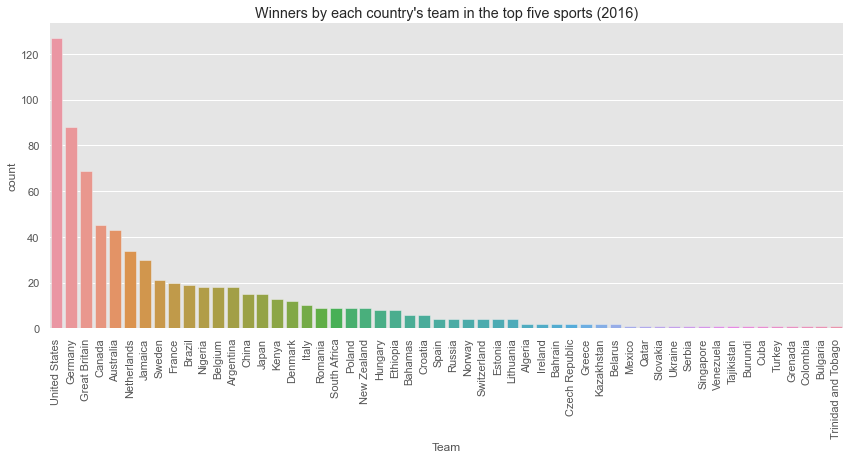

In [17]:
ax3 = sns.catplot("Team", data = winners_2016_top5, aspect = 2.5, kind = "count", order = team_rank)
_ = ax3.set(title="Winners by each country's team in the top five sports (2016)")
_ = ax3.set_xticklabels(rotation=90)

### 5. Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.
<br>
<li> Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

In [18]:
winners_2016_top5.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze


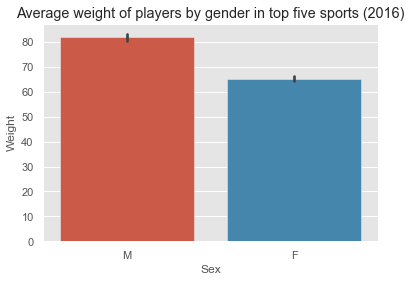

In [19]:
ax4 = sns.barplot(x = 'Sex', y = 'Weight' ,data = winners_2016_top5, estimator = mean)
_ = ax4.set(xlabel="Sex", title ="Average weight of players by gender in top five sports (2016)" )

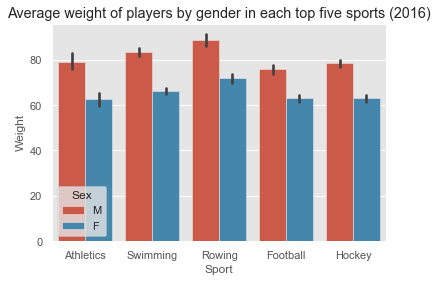

In [20]:
ax5 = sns.barplot(x = 'Sport', y = 'Weight', hue="Sex", data = winners_2016_top5, estimator = mean, order = top5_sports)
_ = ax5.set(title = "Average weight of players by gender in each top five sports (2016)" )